## Observations and Insights

## Dependencies and starter code

In [219]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_metadata_study_results_combined = pd.DataFrame(pd.merge(mouse_metadata ,study_results, on="Mouse ID", how="inner"))

mouse_metadata_study_results_combined


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [255]:
tumor_study_result_group = mouse_metadata_study_results_combined.groupby("Drug Regimen")


In [256]:
datapoints_per_regimen = pd.DataFrame(tumor_study_result_group["Tumor Volume (mm3)"].count()).rename(columns={"Tumor Volume (mm3)": "Total Datapoints"})
regimen_df = datapoints_per_regimen.rename(columns={"Drug Regimen": "Regimen"})

regimen_df = regimen_df.sort_values("Total Datapoints", ascending=False)

regimen_df

,Total Datapoints
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


## Summary statistics

In [262]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_summary_stats =pd.DataFrame(mouse_metadata_study_results_combined["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem']))

tumor_summary_stats

,Tumor Volume (mm3)
mean,50.448381
median,48.951474
var,79.116074
std,8.894722
sem,0.204436


In [224]:
colors= ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]

## Bar plots

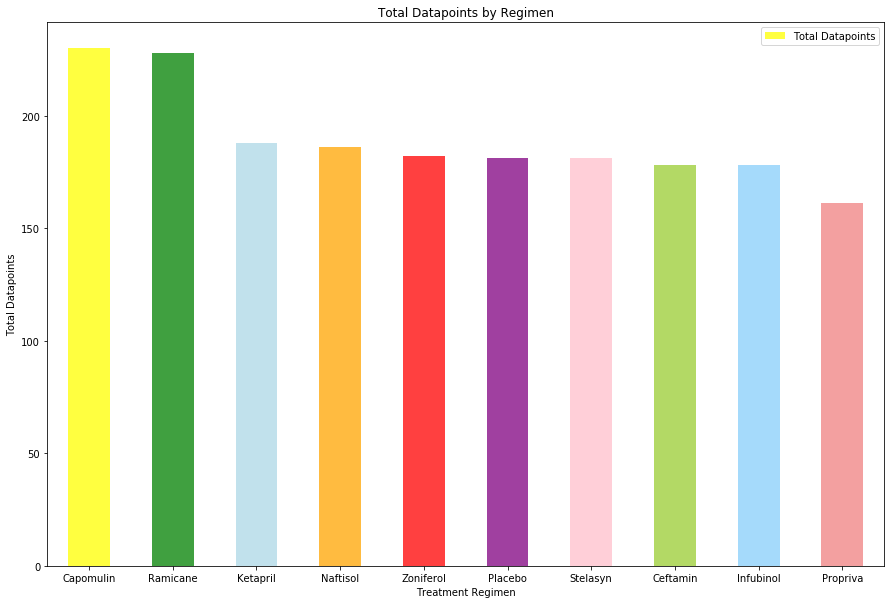

In [225]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas



regimen_df.plot(kind="bar", figsize=(15,10), color=[colors], alpha=0.75, align="center")
plt.xticks(rotation="0")

# Set title for the chart 
plt.title("Total Datapoints by Regimen")

#set labels for the x and y axis
plt.xlabel("Treatment Regimen")
plt.ylabel("Total Datapoints")

#Show pandas plot
plt.show()


In [226]:
# Filter the DataFrame down only to those columns to chart



In [227]:
# use comprehension list to get series for x axis
x_ax =[value for value in mouse_metadata_study_results_combined["Drug Regimen"].unique()]

x_axis = np.arange(len(x_ax))
tick_locations = [value for value in x_ax]


([<matplotlib.axis.XTick at 0x25576f7d9c8>,
 <a list of 10 Text xticklabel objects>)

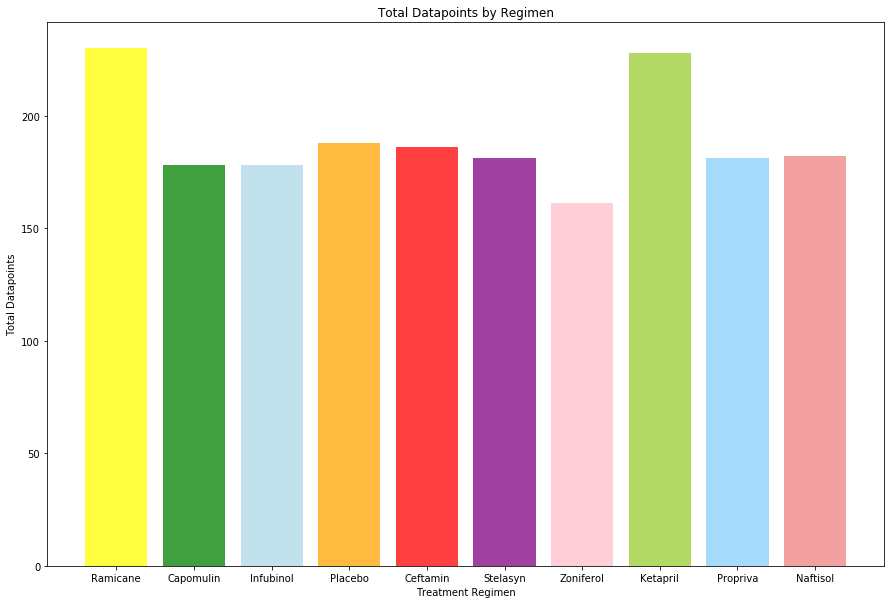

In [228]:
# Create a list indicating where to write x labels and set figure size to adjust for space
colors= ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]
plt.figure(figsize=(15,10))
plt.bar(x_ax, datapoints_per_regimen["Total Datapoints"], color=colors, alpha=.75, align="center")
plt.title("Total Datapoints by Regimen")
plt.xlabel("Treatment Regimen")
plt.ylabel("Total Datapoints")
plt.xticks(tick_locations, x_ax, rotation="0" )


([<matplotlib.axis.XTick at 0x25577059988>,
 <a list of 10 Text xticklabel objects>)

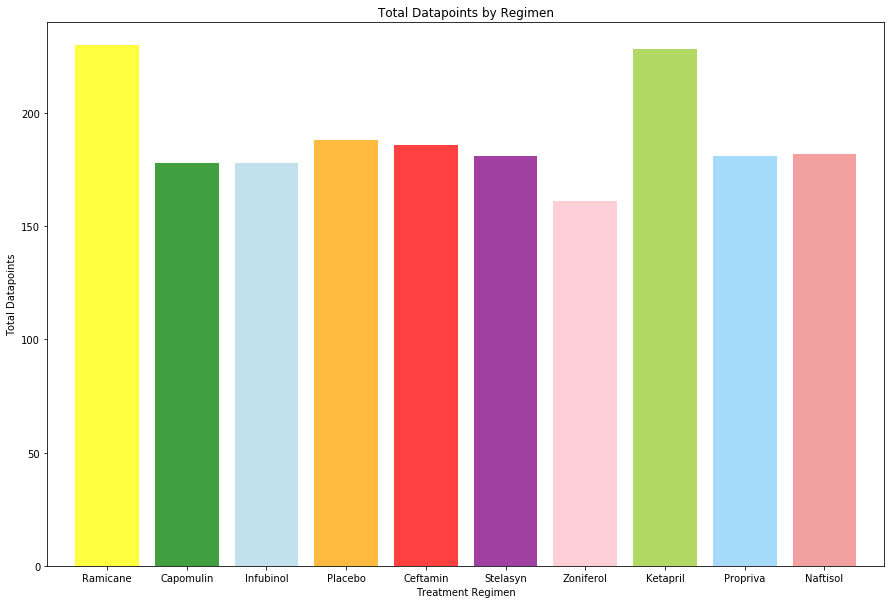

In [229]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# use comprehension list to get series for x and y axis
x_axis =[value for value in mouse_metadata_study_results_combined["Drug Regimen"].unique()]
y_axis = [value for value in datapoints_per_regimen["Total Datapoints"]]

colors= ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.figure(figsize=(15,10))
plt.xlim(-0.75, len(x_axis) -.25)
plt.ylim(0, max(y_axis) + 10)


plt.bar(x_axis, y_axis, color=colors, alpha=0.75, align="center")
plt.title("Total Datapoints by Regimen")
plt.xlabel("Treatment Regimen")
plt.ylabel("Total Datapoints")

plt.xticks(tick_locations, x_axis)





In [230]:
# Create a list indicating where to write x labels and set figure size to adjust for space


In [231]:
gender_group = mouse_metadata_study_results_combined.groupby("Sex")

male_mice = mouse_metadata_study_results_combined.loc[mouse_metadata_study_results_combined["Sex"] == "Male"].count()
male_count = male_mice["Sex"]

female_mice = mouse_metadata_study_results_combined.loc[mouse_metadata_study_results_combined["Sex"] == "Female"].count()
female_count = female_mice["Sex"]

## Pie plots

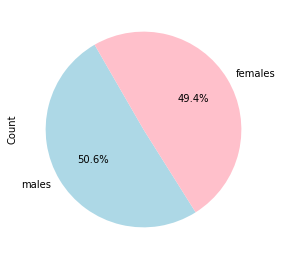

In [232]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

df = pd.DataFrame({"Count": [male_count, female_count]},
                   index=["males", "females"])

sizes = [male_count, female_count]

colors = ["lightblue", "pink"]

df.plot.pie(y="Count", figsize=(4.5, 4.5), subplots=False, startangle=120, colors=colors, autopct="%1.1f%%", legend=False)


(-1.1108169443723674,
 1.13554197729537,
 -1.1103731586818266,
 1.1357968312586944)

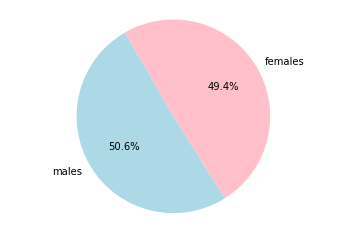

In [233]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


# Labels for the sections of our pie chart
labels = ["males", "females"]

# The values of each section of the pie chart
sizes = [male_count, female_count]

# The colors of each section of the pie chart
colors = ["lightblue", "pink"]

# Tells matplotlib to seperate the "Humans" section from the others
#explode = (0.1, 0, 0, 0)

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=120)

plt.axis("equal")

## Quartiles, outliers and boxplots

In [234]:
most_promising_df = regimen_df.head(4)

mouse_metadata_study_results_combined["Metastatic Sites"]
most_promising_list = pd.Series([most_promising_df])


In [235]:
# to get four of the most promising treatment regimens I need to see which Drug Regimen has 
# shown the largest reduction in the Tumor over the course of the experiment

# STEPS:
# 1. Get Tumor size at min Time point
# 2. Get Tumor size at max Timepoint
# 3. Determine which are the 3 most effective Drug Regimen for Reducing the Tumor based on the data
# 4. Compare the top 3 with Capomulin, the Drug Regimen we are most interested in


# create a structure to group by Mouse ID
mouse_grouping = mouse_metadata_study_results_combined.groupby("Mouse ID")


In [236]:
#Min Datapoints
# get the min and max Timepoint for each mouse in the experiment
mouse_min_datapoints = mouse_grouping["Timepoint"].min()
# reset the index
mouse_min_datapoints.reset_index()

#create a data frame to get all the datapoints which correspond to the min(Timepoint) for each Mouse
#from the combined dataset
mouse_min_df = pd.merge(mouse_min_datapoints, mouse_metadata_study_results_combined, on=["Mouse ID", "Timepoint"], how="left")
mouse_min_df = mouse_min_df.rename(columns={"Weight (g)": "T0_Weight (g)", "Tumor Volume (mm3)" : "T0_Tumor Volume (mm3)","Metastatic Sites" : "T0_Metastatic Sites" })
#mouse_min_df[["Mouse ID", "Drug Regimen","Sex", "T0_Age_months", "T0_Weight (g)", "T0_Tumor Volume (mm3)", "T0_Metastatic Sites"]]
mouse_min_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,T0_Weight (g),T0_Tumor Volume (mm3),T0_Metastatic Sites
0,a203,0,Infubinol,Female,20,23,45.0,0
1,a251,0,Infubinol,Female,21,25,45.0,0
2,a262,0,Placebo,Female,17,29,45.0,0
3,a275,0,Ceftamin,Female,20,28,45.0,0
4,a366,0,Stelasyn,Female,16,29,45.0,0
...,...,...,...,...,...,...,...,...
245,z435,0,Propriva,Female,12,26,45.0,0
246,z578,0,Ramicane,Male,11,16,45.0,0
247,z581,0,Infubinol,Female,24,25,45.0,0
248,z795,0,Naftisol,Female,13,29,45.0,0


In [237]:
#Max Datapoints
mouse_max_datapoints = mouse_grouping["Timepoint"].max()
# reset the index
mouse_max_datapoints.reset_index()

#create a data frame to get all the datapoints which correspond to the max(Timepoint) for each Mouse
#from the combined dataset
mouse_max_df = pd.merge(mouse_max_datapoints, mouse_metadata_study_results_combined, on=["Mouse ID", "Timepoint"], how="left")
mouse_max_df = mouse_max_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)","Metastatic Sites" ]]

mouse_max_df

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,67.973419,2
1,a251,Infubinol,65.525743,1
2,a262,Placebo,70.717621,4
3,a275,Ceftamin,62.999356,3
4,a366,Stelasyn,63.440686,1
...,...,...,...,...
244,z435,Propriva,48.710661,0
245,z578,Ramicane,30.638696,0
246,z581,Infubinol,62.754451,3
247,z795,Naftisol,65.741070,3


In [238]:
mouse_min_max_df = pd.merge(mouse_min_df, mouse_max_df, on=["Mouse ID", "Drug Regimen"], how="inner")
mouse_min_max_df["Change_in_Tumor_Volume (mm3)"] = mouse_min_max_df["Tumor Volume (mm3)"] - mouse_min_max_df["T0_Tumor Volume (mm3)"]
mouse_min_max_df["% Change_in_Tumor_Volume (mm3)"] = (mouse_min_max_df["Change_in_Tumor_Volume (mm3)"] / mouse_min_max_df["T0_Tumor Volume (mm3)"]) * 100
#mouse_min_max_df.sort_values("% Change_in_Tumor_Volume (mm3)")


In [239]:
mouse_min_max_df = pd.merge(mouse_min_df, mouse_max_df, on=["Mouse ID", "Drug Regimen"], how="inner")
mouse_min_max_df["Change_in_Tumor_Volume (mm3)"] = mouse_min_max_df["Tumor Volume (mm3)"] - mouse_min_max_df["T0_Tumor Volume (mm3)"]
mouse_min_max_df["% Change_in_Tumor_Volume (mm3)"] = (mouse_min_max_df["Change_in_Tumor_Volume (mm3)"] / mouse_min_max_df["T0_Tumor Volume (mm3)"]) * 100
mouse_min_max_df.sort_values("% Change_in_Tumor_Volume (mm3)")


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,T0_Weight (g),T0_Tumor Volume (mm3),T0_Metastatic Sites,Tumor Volume (mm3),Metastatic Sites,Change_in_Tumor_Volume (mm3),% Change_in_Tumor_Volume (mm3)
98,k403,0,Ramicane,Male,21,16,45.0,0,22.050126,1,-22.949874,-50.999719
176,s185,0,Capomulin,Female,3,17,45.0,0,23.343598,1,-21.656402,-48.125338
123,m601,0,Capomulin,Male,22,17,45.0,0,28.430964,1,-16.569036,-36.820080
228,x401,0,Capomulin,Female,16,15,45.0,0,28.484033,0,-16.515967,-36.702149
70,g791,0,Ramicane,Male,11,16,45.0,0,29.128472,1,-15.871528,-35.270063
...,...,...,...,...,...,...,...,...,...,...,...,...
188,t724,0,Naftisol,Female,2,25,45.0,0,75.113288,2,30.113288,66.918418
119,m269,0,Stelasyn,Female,22,28,45.0,0,75.123690,1,30.123690,66.941532
149,p189,0,Ketapril,Male,8,28,45.0,0,75.294936,4,30.294936,67.322080
114,l725,0,Naftisol,Female,8,26,45.0,0,76.668817,3,31.668817,70.375150


In [240]:
# Grooup by Mouse Regimen then isolate the Top 4 Regimen
mouse_regimen_group = mouse_min_max_df.groupby("Drug Regimen")

regimen_tumor_results = pd.DataFrame(mouse_regimen_group["% Change_in_Tumor_Volume (mm3)"].min())
regimen_tumor_results.reset_index()
most_promising_regimen = regimen_tumor_results.sort_values("% Change_in_Tumor_Volume (mm3)").head(4)
max_datapoints_for_most_promising_regimen = pd.merge(mouse_max_df, most_promising_regimen, on="Drug Regimen", how="inner").filter(["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)", "Metastatic Sites"])
max_datapoints_for_most_promising_regimen["Drug Regimen"].unique()

array(['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'], dtype=object)

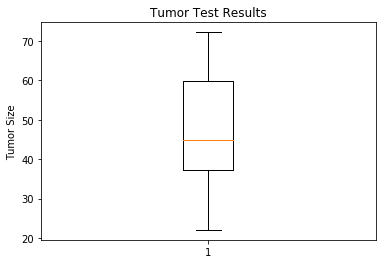

In [241]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Test Results')
ax1.set_ylabel('Tumor Size')
ax1.boxplot(max_datapoints_for_most_promising_regimen["Tumor Volume (mm3)"])
plt.show()

In [242]:
# array(['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'], dtype=object)
# All 4 Regimens - Results

quartiles = max_datapoints_for_most_promising_regimen["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume in mm3 is: {lowerq}")
print(f"The upper quartile of Tumor Volume in mm3 is: {upperq}")
print(f"The interquartile range of Tumor Volume in mm3 is: {iqr}")
print(f"The the median of Tumor Volume in mm3 is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_tumor_results = max_datapoints_for_most_promising_regimen.loc[(max_datapoints_for_most_promising_regimen["Tumor Volume (mm3)"] < lower_bound) | (max_datapoints_for_most_promising_regimen["Tumor Volume (mm3)"] > upper_bound)]
outlier_tumor_results

The lower quartile of Tumor Volume in mm3 is: 37.187743802499995
The upper quartile of Tumor Volume in mm3 is: 59.930261755000004
The interquartile range of Tumor Volume in mm3 is: 22.74251795250001
The the median of Tumor Volume in mm3 is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


,Mouse ID,Drug Regimen,Tumor Volume (mm3),Metastatic Sites


In [243]:
# Capomulin - Results

capo = pd.DataFrame(max_datapoints_for_most_promising_regimen.loc[max_datapoints_for_most_promising_regimen["Drug Regimen"] =="Capomulin"]["Tumor Volume (mm3)"])
quartiles = capo["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin Treatment - Tumor Volume in mm3 is: {lowerq}")
print(f"The upper quartile of Capomulin Treatment - Tumor Volume in mm3 is: {upperq}")
print(f"The interquartile range of Capomulin Treatment - Tumor Volume in mm3 is: {iqr}")
print(f"The the median of Capomulin Treatment - Tumor Volume in mm3 is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} for Capomulin Treatment could be outliers.")
print(f"Values above {upper_bound} for Capomulin Treatment could be outliers.")

#capo_outlier_tumor_results = capo.loc[(capo["Tumor Volume (mm3)"] < lower_bound) | (capo["Tumor Volume (mm3)"] > upper_bound)]
#capo_outlier_tumor_results

The lower quartile of Capomulin Treatment - Tumor Volume in mm3 is: 32.37735684
The upper quartile of Capomulin Treatment - Tumor Volume in mm3 is: 40.1592203
The interquartile range of Capomulin Treatment - Tumor Volume in mm3 is: 7.781863460000004
The the median of Capomulin Treatment - Tumor Volume in mm3 is: 38.125164399999996 
Values below 20.70456164999999 for Capomulin Treatment could be outliers.
Values above 51.83201549 for Capomulin Treatment could be outliers.


In [244]:
# Ceftamin - Results 

ceft = pd.DataFrame(max_datapoints_for_most_promising_regimen.loc[max_datapoints_for_most_promising_regimen["Drug Regimen"] =="Ceftamin"]["Tumor Volume (mm3)"])

quartiles = ceft["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin Treatment - Tumor Volume in mm3 is: {lowerq}")
print(f"The upper quartile of Ceftamin Treatment - Tumor Volume in mm3 is: {upperq}")
print(f"The interquartile range of Ceftamin Treatment - Tumor Volume in mm3 is: {iqr}")
print(f"The the median of Ceftamin Treatment - Tumor Volume in mm3 is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} for Ceftamin Treatment could be outliers.")
print(f"Values above {upper_bound} for Ceftamin Treatment could be outliers.")



The lower quartile of Ceftamin Treatment - Tumor Volume in mm3 is: 48.72207785
The upper quartile of Ceftamin Treatment - Tumor Volume in mm3 is: 64.29983003
The interquartile range of Ceftamin Treatment - Tumor Volume in mm3 is: 15.577752179999997
The the median of Ceftamin Treatment - Tumor Volume in mm3 is: 59.85195552 
Values below 25.355449580000002 for Ceftamin Treatment could be outliers.
Values above 87.66645829999999 for Ceftamin Treatment could be outliers.


In [245]:
# Infubinol - Results

infu = pd.DataFrame(max_datapoints_for_most_promising_regimen.loc[max_datapoints_for_most_promising_regimen["Drug Regimen"] =="Infubinol"]["Tumor Volume (mm3)"])



quartiles = infu["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol Treatment - Tumor Volume in mm3 is: {lowerq}")
print(f"The upper quartile of Infubinol Treatment - Tumor Volume in mm3 is: {upperq}")
print(f"The interquartile range of Infubinol Treatment - Tumor Volume in mm3 is: {iqr}")
print(f"The the median of Infubinol Treatment - Tumor Volume in mm3 is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} for Infubinol Treatment could be outliers.")
print(f"Values above {upper_bound} for Infubinol Treatment could be outliers.")

#infu_outlier_tumor_results = infu.loc[(capo["Tumor Volume (mm3)"] < lower_bound) | (infu["Tumor Volume (mm3)"] > upper_bound)]
#infu_outlier_tumor_results

The lower quartile of Infubinol Treatment - Tumor Volume in mm3 is: 54.04860769
The upper quartile of Infubinol Treatment - Tumor Volume in mm3 is: 65.52574285
The interquartile range of Infubinol Treatment - Tumor Volume in mm3 is: 11.477135160000003
The the median of Infubinol Treatment - Tumor Volume in mm3 is: 60.16518046 
Values below 36.83290494999999 for Infubinol Treatment could be outliers.
Values above 82.74144559000001 for Infubinol Treatment could be outliers.


In [246]:
# Ramicane - Results

rami = pd.DataFrame(max_datapoints_for_most_promising_regimen.loc[max_datapoints_for_most_promising_regimen["Drug Regimen"] =="Ramicane"]["Tumor Volume (mm3)"])


quartiles = rami["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane Treatment - Tumor Volume in mm3 is: {lowerq}")
print(f"The upper quartile of Ramicane Treatment - Tumor Volume in mm3 is: {upperq}")
print(f"The interquartile range of Ramicane Treatment - Tumor Volume in mm3 is: {iqr}")
print(f"The the median of Ramicane Treatment - Tumor Volume in mm3 is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} for Ramicane Treatment could be outliers.")
print(f"Values above {upper_bound} for Ramicane Treatment could be outliers.")

#rami_outlier_tumor_results = rami.loc[(capo["Tumor Volume (mm3)"] < lower_bound) | (rami["Tumor Volume (mm3)"] > upper_bound)]
#rami_outlier_tumor_results

The lower quartile of Ramicane Treatment - Tumor Volume in mm3 is: 31.56046955
The upper quartile of Ramicane Treatment - Tumor Volume in mm3 is: 40.65900627
The interquartile range of Ramicane Treatment - Tumor Volume in mm3 is: 9.098536719999998
The the median of Ramicane Treatment - Tumor Volume in mm3 is: 36.56165229 
Values below 17.912664470000003 for Ramicane Treatment could be outliers.
Values above 54.30681135 for Ramicane Treatment could be outliers.


In [247]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

mrk = dict(markerfacecolor = 'green', markersize =10)
#plt.boxplot([capo], labels =['ca'], flierprops = mrk)


## Line and scatter plots

In [248]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Identify the mouse treated with with Capomulin that has shown the greateest reduction in its tumor
capo_data = pd.DataFrame(mouse_metadata_study_results_combined.loc[mouse_metadata_study_results_combined["Drug Regimen"]=="Capomulin"].groupby("Mouse ID").min().head(1))
capo_data.reset_index()
# b128	Capomulin	Female	9	22	0	37.967644	0
mouse_data = pd.DataFrame(mouse_metadata_study_results_combined.loc[mouse_metadata_study_results_combined["Drug Regimen"]=="Capomulin"])

mouse_datapoints = mouse_data.loc[mouse_data["Mouse ID"]=="b128"]
mouse_datapoints

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


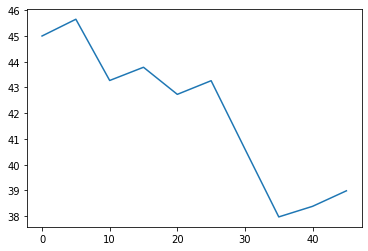

In [249]:
plt.plot(mouse_datapoints["Timepoint"], mouse_datapoints["Tumor Volume (mm3)"])

In [250]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

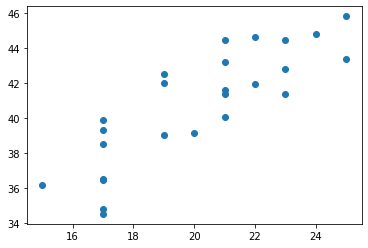

In [251]:
capo_means = mouse_metadata_study_results_combined.loc[mouse_metadata_study_results_combined["Drug Regimen"]=="Capomulin"].groupby("Mouse ID").mean()
plt.scatter(capo_means["Weight (g)"], capo_means["Tumor Volume (mm3)"])

In [252]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [253]:
# calculate regression line details
reg_details = st.linregress(capo_means["Weight (g)"], capo_means["Tumor Volume (mm3)"]) 
# LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

y_value = capo_means["Weight (g)"] * reg_details[0] + reg_details[1]


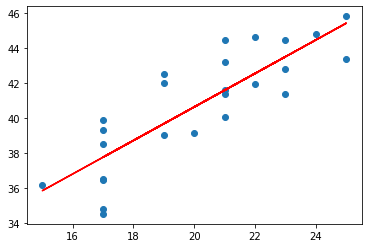

In [211]:
plt.scatter(capo_means["Weight (g)"], capo_means["Tumor Volume (mm3)"])
plt.plot(capo_means["Weight (g)"], y_value, color="red")